In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']= [u'SimHei']
matplotlib.rcParams['axes.unicode_minus']=False


In [5]:
def pca(data_mat,top_k_feat = 99999999):
    mean_vals = np.mean(data_mat,axis=0)
    mean_removed = (data_mat-mean_vals)
#     stddev_vals = np.std(data_mat,axis=0)
#     mean_removed = mean_removed/stddev_vals
#     mean_removed = np.mat(pd.DataFrame(mean_removed).replace(np.nan,0))
    cov_mat = np.cov(mean_removed,rowvar=0)
    U,S,V = np.linalg.svd(cov_mat)
    red_vects = U[:,:top_k_feat]
    red_data_mat = mean_removed*red_vects
    recon_mat = red_data_mat * red_vects.T+mean_vals
#     recon_mat = np.mat((red_data_mat*red_vects.T).A*(stddev_vals.A))+mean_vals
    return red_data_mat,recon_mat
def get_top_k_feat(eig_values,variance_ratio=0.99):
    sum_S = float(np.sum(eig_values))
    curr_S = 0
    for i in range(len(eig_values)):
        cuur_S += float(eig_values[i])
        if curr_S/sum_S >= variance_ratio:
            return i+1


In [7]:
def plot_picture(dataMat,reconMat):
    plt.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],c='b',marker='o',s = 50)
    plt.scatter(reconMat[:,0].flatten().A[0],reconMat[:,1].flatten().A[0],c='r',marker='^',s = 30)
    plt.title('原始数据和重构数据分布')
    plt.show()
    

In [8]:
if __name__=='__main__':
    data_mat = random_data()
    red_data_mat, recon_mat = pca(data_mat,1)
    plot_picture(data_mat,recon_mat)

In [10]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [12]:
matplotlib.rcParams['font.sans-serif']=[u'SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
def make_blods_data():
    X,y = make_blobs(n_samples=10000,n_features=3,centers=[[3,3,3],[4,4,4],[5,5,5],[6,6,6]],
                     cluster_std=[0.1,0.2,0.1,0.2],
                     random_state=3)
    fig = plt.figure()
    ax = Axes3D(fig,rect=[0,0,1,1],elev=30,azim=20)
    plt.scatter(X[:,0],X[:,1],X[:,2],marker='o')
    plt.show()
    return X


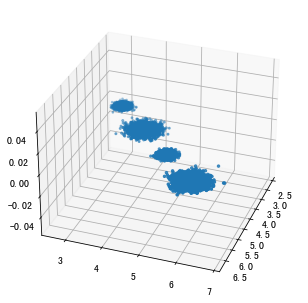

[0.98688628 0.00666155]


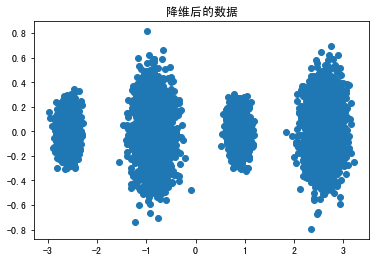

In [14]:
if __name__=='__main__':
    data_mat = make_blods_data()
    pca = PCA(n_components=2).fit(data_mat)
    print(pca.explained_variance_ratio_)
    reduced_X = pca.transform(data_mat)
    plt.scatter(reduced_X[:,0],reduced_X[:,1],marker='o')
    plt.title('降维后的数据')
    plt.show()

In [16]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=[u'SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

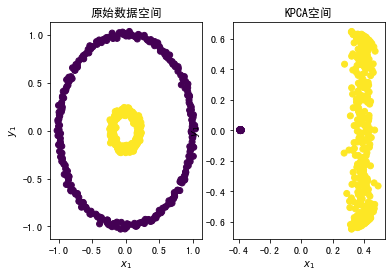

In [18]:
def make_circle_data():
    X,y = make_circles(n_samples=600,factor=0.2,noise=0.02)
    return X,y
def plot_kpca_picture(x,y,x_kpca):
    plt.subplot(121)
    plt.title('原始数据空间')
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.xlabel('$x_1$')
    plt.ylabel('$y_1$')
    
    plt.subplot(122)
    plt.title('KPCA空间')
    plt.scatter(x_kpca[:,0],x_kpca[:,1],c=y)
    plt.xlabel('$x_1$')
    plt.ylabel('$y_1$')
    
if __name__=='__main__':
    x,y = make_circle_data()
    kpca = KernelPCA(kernel='rbf',gamma=10)
    x_kpca = kpca.fit_transform(x)
    plot_kpca_picture(x,y,x_kpca)